In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import elephant
import quantities as pq
import neo
import mne

%matplotlib inline



### Overview:

!In development - using MNE-Python Toolbox, Elephant, and SSIMS/SIMNETS to visualize continuous data


#### WHAT


#### WHY


#### STEPS



#### RESOURCES:


##### MNE-Python Toolbox 
[1] Alexandre Gramfort, Martin Luessi, Eric Larson, Denis A. Engemann, Daniel Strohmeier, Christian Brodbeck, Roman Goj, Mainak Jas, Teon Brooks, Lauri Parkkonen, and Matti S. Hämäläinen. MEG and EEG data analysis with MNE-Python. Frontiers in Neuroscience, 7(267):1–13, 2013. doi:10.3389/fnins.2013.00267.

[2] Elephant (doi:10.5281/zenodo.1186602; RRID:SCR_003833) elephant electrophysiology analysistoolkit: a very useful and well-maintained codebase for analyzing neural data. Includes both classic signal processing tools/tutorials and more advanced neural analysis tools/tutorials. https://elephant.readthedocs.io/en/stable/tutorials/statistics.html www.python-elephant.org

Author: jacqueline_hynes@brown.edu, June 2023
Contact: @author Jacqueline Hynes

#### Load EEG/MEG Data & Extract Trigger/Stim events
We’ll start this tutorial by loading one of the example datasets (called “Sample”), which contains EEG and MEG data from one subject performing an audiovisual experiment, along with structural MRI scans for that subject. 

The mne.datasets.sample.data_path function will automatically download the dataset if it isn’t found in one of the expected locations, then return the directory path to the dataset (see the documentation of data_path for a list of places it checks before downloading). Note: 
- Here, we are using a filtered and downsampled version of the data (sample_audvis_filt-0-40_raw.fif).
- An unfiltered version (sample_audvis_raw.fif) is also included in the sample dataset and could be substituted here when running the tutorial locally



### Explore the Raw Data:

1) plot profile spectral density 
2) plots events ids in time

In [327]:
# set path, filename, and use fif read function 
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif")

# Extract raw EEG/MEG data
raw = mne.io.read_raw_fif(sample_data_raw_file)
orig_raw = raw.copy()    # this save the loaded data to memory, rather than "read as needed"
raw.load_data()




Opening raw data file /Users/jhynes1/mne_data/MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Reading 0 ... 41699  =      0.000 ...   277.709 secs...


<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~122.8 MB, data loaded>

### Event Extraction: 
Trigger events are on a specific stim channel:  event dictionary that maps the integer IDs to experimental conditions or events. In this dataset, the mapping looks like this:

Event dictionary: 
    "auditory/left": 1,
    "auditory/right": 2,
    "visual/left": 3,
    "visual/right": 4,
    "smiley": 5,
    "buttonpress": 32,

In [359]:

# Extract Events/Triggers 
event_dict = {
    "auditory/left": 1,
    "auditory/right": 2,
    "visual/left": 3,
    "visual/right": 4,
    "smiley": 5,
    "buttonpress": 32,
}

events = mne.find_events(raw, stim_channel="STI 014")
print(f'number of events = {events.shape} ')
print(f' first 5 events = {events[:5]}')


# Extract Epochs: 
reject_criteria = dict(mag=4000e-15,  # 4000 fT
    grad=4000e-13,  # 4000 fT/cm
    eeg=150e-6,  # 150 µV
    eog=250e-6,
)  # 250 µV

# create epochs 
epochs = mne.Epochs(raw,events, event_id=event_dict, tmin=-0.1, tmax=0.4, reject=reject_criteria, preload=True, verbose=0)


conds_we_care_about = ["auditory/left", "auditory/right", "visual/left", "visual/right"]
epochs.equalize_event_counts(conds_we_care_about)  # this operates in-place

A_epochs = epochs["auditory"]
V_epochs = epochs["visual"]



AV_epochs = np.concatenate([A_epochs, V_epochs])
A_epochs_np = np.array(A_epochs)
V_epochs_np = np.array(V_epochs)


# data labels 
eventid_sort = np.concatenate([np.zeros(len(A_epochs_np), dtype=int),np.ones(len(V_epochs_np), dtype=int)])
chs = [ "EEG 002", "EEG 005", "EEG 010", "EEG 011", "EEG 012", "EEG 013",  "EEG 014","EEG 015" ]
num_trials=len(eventid_sort)
num_ch = len(chs)



319 events found
Event IDs: [ 1  2  3  4  5 32]
number of events = (319, 3) 
 first 5 events = [[6994    0    2]
 [7086    0    3]
 [7192    0    1]
 [7304    0    4]
 [7413    0    2]]
Dropped 5 epochs: 121, 196, 259, 276, 278


Effective window size : 13.639 (s)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


/Users/jhynes1/anaconda3/envs/mne/lib/python3.11/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


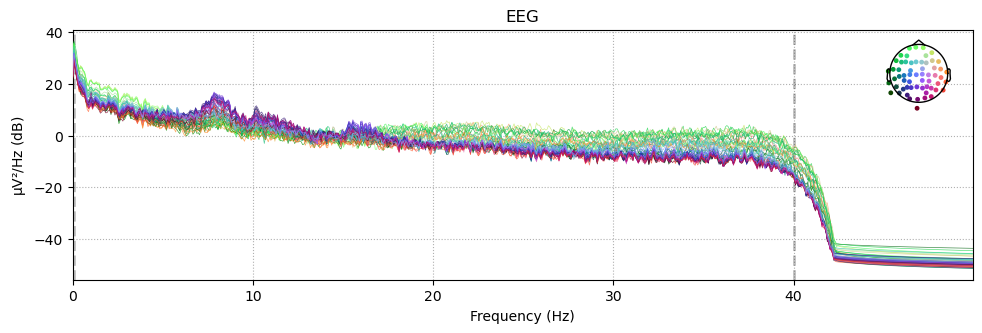

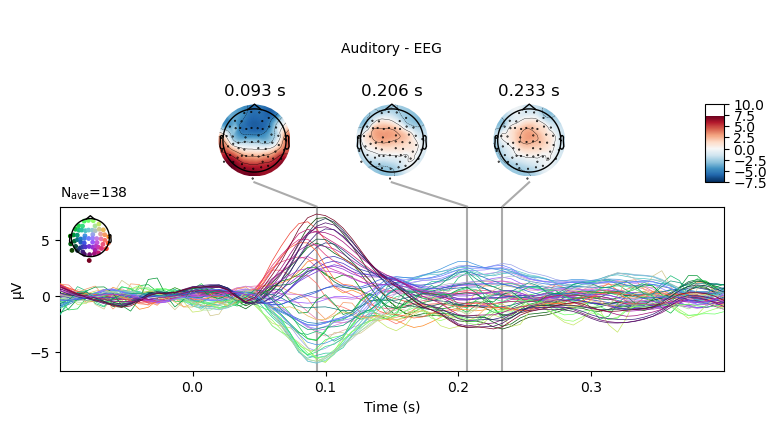

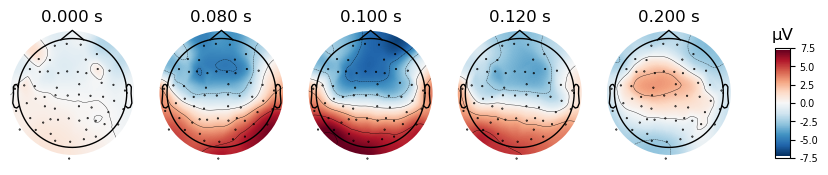

Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


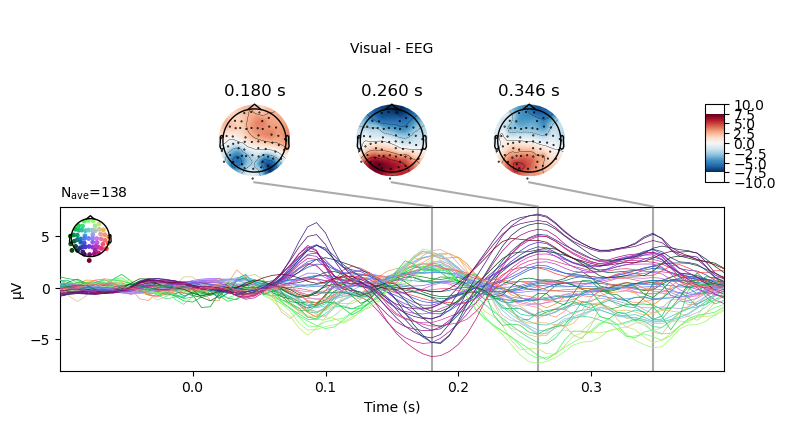

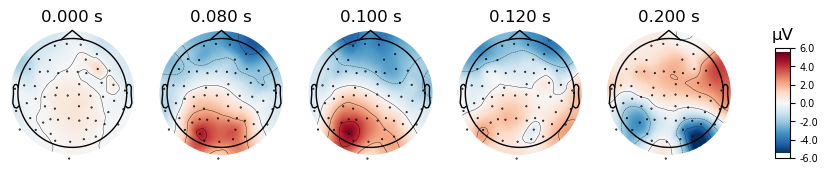

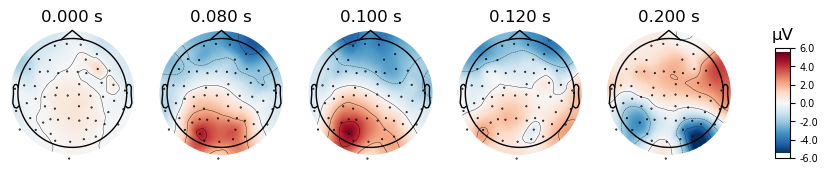

In [361]:
%matplotlib inline

# Figure 1. visualization of raw data 
raw.compute_psd(fmax=50).plot(picks="eeg", exclude="bads")

# stim dependent events
aud_evoked = A_epochs.average()
vis_evoked = V_epochs.average()
 

# stim dependent events

aud_evoked.plot_joint(picks="eeg", title="Auditory - EEG")
aud_evoked.plot_topomap(times=[0.0, 0.08, 0.1, 0.12, 0.2], ch_type="eeg")

vis_evoked.plot_joint(picks="eeg", title="Visual - EEG")
vis_evoked.plot_topomap(times=[0.0, 0.08, 0.1, 0.12, 0.2], ch_type="eeg")




In [356]:
from elephant.spike_train_dissimilarity import van_rossum_distance
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE

#### Select Example Channels

perp_ch = 5
perp_tr = 5
 

tsne_ch = TSNE(n_components=2, verbose=0, perplexity=perp_ch, n_iter=500)
tsne_ens = TSNE(n_components=2, verbose=0, perplexity=perp_tr, n_iter=500)

distmat_all = []
distspace_all = []
for n in range(num_ch):  
    
    distmat = cosine_similarity(AV_epochs[:,:,n])
    distmat_all.append(distmat)
    
    distspace = tsne_ch.fit_transform(distmat)
    distspace_all.append(distspace)

distmat_allT = np.concatenate(distmat_all, axis=1)
distspace_ensSSIMS = tsne_ens.fit_transform(distmat_allT)
distmat_all = np.array(distmat_all)
distspace_all = np.array(distspace_all)


Text(0, 0.5, 'tsne-y')

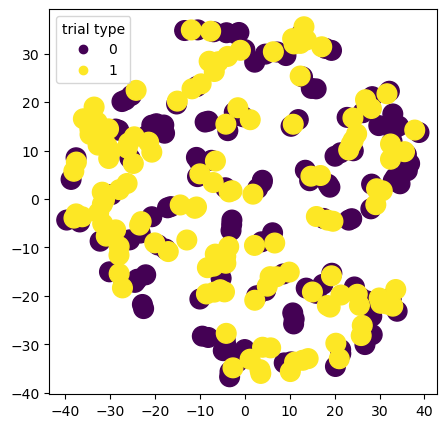

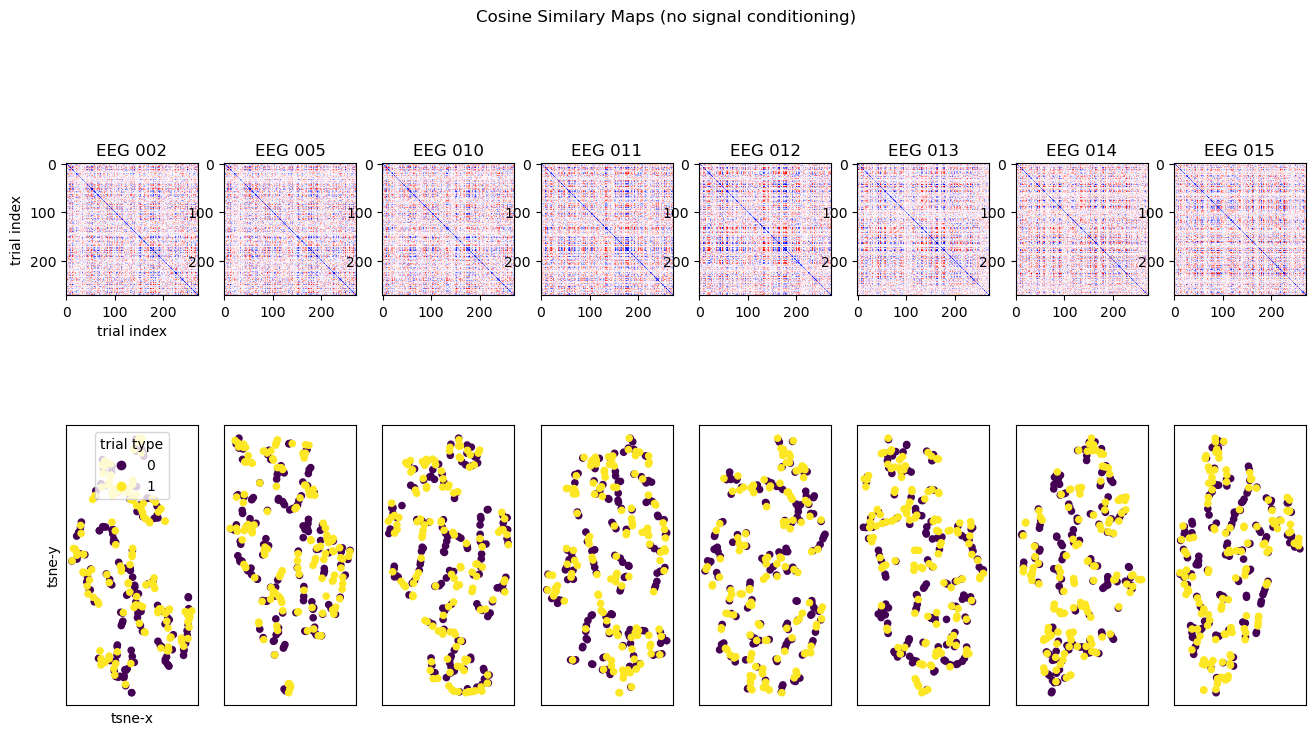

<Figure size 3200x2400 with 0 Axes>

In [365]:

# plot full ensemble - all data
fig, axs = plt.subplots(1,1, figsize=(5,5))
scatterFig = plt.scatter(distspace_ensSSIMS[:,0], distspace_ensSSIMS[:,1], c=eventid_sort, s=200)
axs.legend(*scatterFig.legend_elements(), loc = 'upper left', title="trial type") 

# subplots
fig, axs = plt.subplots(2,num_ch, figsize=(13,8))
fig.set_figwidth(16) 
plt.figure(dpi=500)


#df_events = pd.DataFrame(eventsid_sort, columns = ['ts', 'nan',  print(distspace_ensemble[p])

for p in range(num_ch):
    
    df_events = pd.DataFrame(distspace_all[p], columns = ['dim-x', 'dim-y'], index= eventid_sort )
    
    axs[0,p].imshow(distmat_ensemble[p], cmap='seismic' )  
    axs[0,p].set_title(chs[p])
    
    scatterFig = axs[1,p].scatter(distspace_all[p][:,0], distspace_all[p][:,1], c=eventid_sort, s=20) 
    axs[1,p].set_xticks([])
    axs[1,p].set_yticks([])

fig.suptitle('Cosine Similary Maps (no signal conditioning)')
axs[0,0].set_xlabel('trial index')
axs[0,0].set_ylabel('trial index')
axs[1,0].legend(*scatterFig.legend_elements(), loc = 'upper center', title="trial type") 
axs[1,0].set_xlabel('tsne-x')
axs[1,0].set_ylabel('tsne-y')

### Preprocessing:
Let's try a few data pre-processing techniques using: mne.preprocessing and mne.filter submodules. 
- maxwell filtering, 
- signal-space projection, 
- independent components analysis, filtering, 
- downsampling 

